   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
gender                   int64
age       

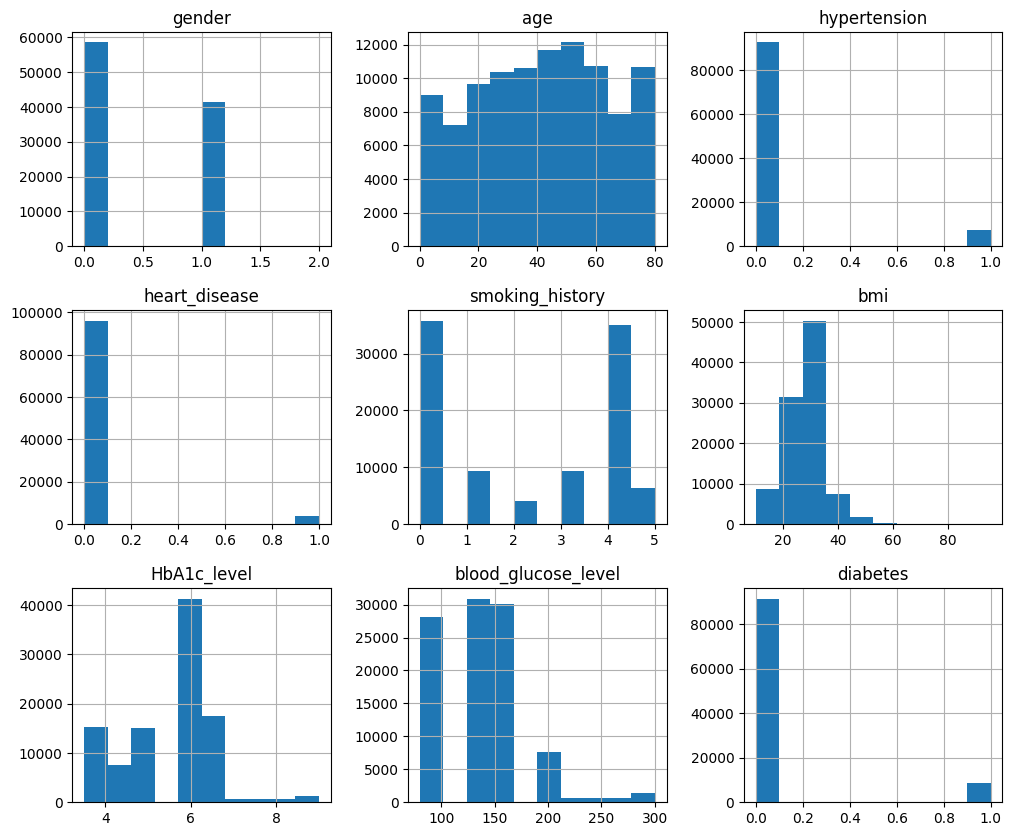

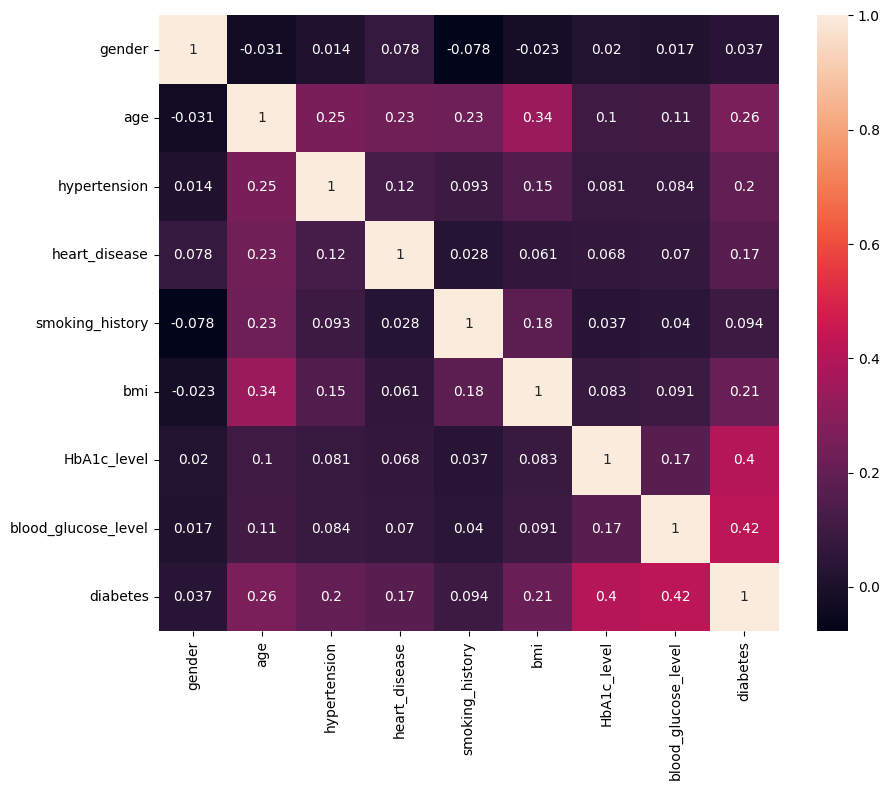

In [ ]:
# CORRELATION MATRIX AND HISTOGRAMS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Encode the 'gender' and 'smoking_history' columns
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['smoking_history'] = LabelEncoder().fit_transform(data['smoking_history'])

# Data Exploration
print(data.head())
print(data.isnull().sum())
print(data.dtypes)

# Data Visualization
data.hist(figsize=(12, 10))
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()




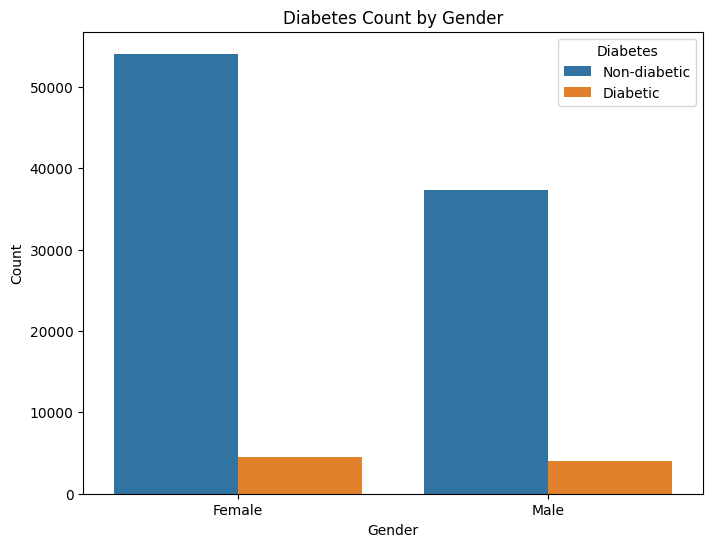

In [ ]:
# GRAPH PLOT TO STUDY THE DISTRIBUTION

import matplotlib.pyplot as plt
import seaborn as sns

# 'data' is the DataFrame and it has columns 'gender' and 'diabetes'
# where 'gender' is already encoded (0 for Female, 1 for Male)

# Reversing the gender encoding for visualization purposes
data['gender'] = data['gender'].map({0: 'Female', 1: 'Male'})

# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Diabetes Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])
plt.show()


In [ ]:
# CALCULATING MODELS ACCURACIES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'modified_diabetes_dataset.csv' 
data = pd.read_csv(file_path)

# Splitting the dataset into features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


KNN Accuracy: 0.96125
Naive Bayes Accuracy: 0.90475
